In [1]:
import librosa
import numpy as np
import librosa.display
import csv
from scipy.signal import savgol_filter
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
audio_filename = '/Users/leek13/data/LENA/1180_LENA/AN1/segmented_2min/22.wav'

In [6]:
##Hyperparameters
n_fft = 1764
hop_length = 882
n_mels = 128

##Set your filenames
# audio_filename = 'P34_2.wav'
# output_file = "preprocessed.csv"

##Read audio file
y, sr = librosa.load(audio_filename)
duration = librosa.get_duration(y=y, sr=sr)

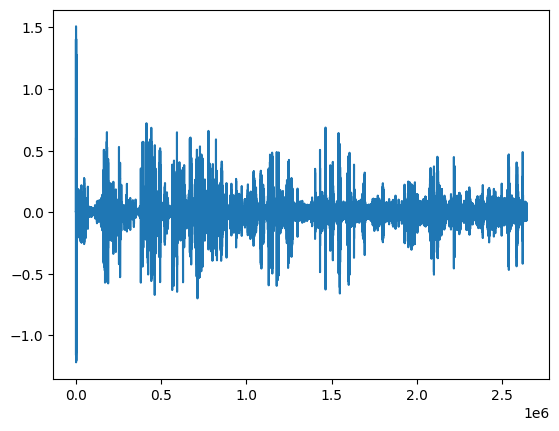

In [7]:
plt.plot(y)

In [16]:
sos = signal.butter(300, 6000, 'hp', fs=sr, output='sos')
y  = signal.sosfilt(sos, y)
# We'll need IPython.display's Audio widget
from IPython.display import Audio
Audio(data=y, rate=sr)

In [17]:
x = y
x[abs(x)<0.1] = 0
x[abs(x)>0]=1

22050.0


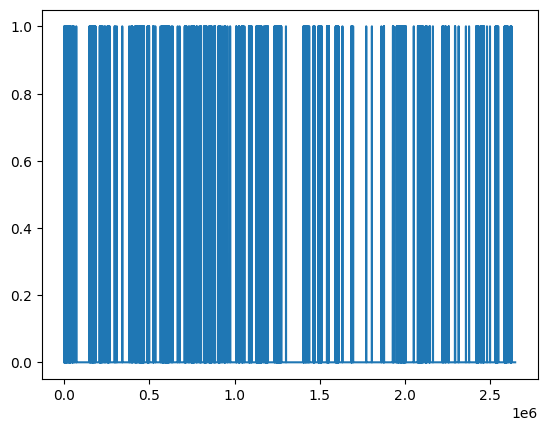

In [10]:
plt.plot(x)
print(len(y)/120) # result: 22050

In [11]:
freq = int(len(y) / 120)
# i = 1
# firstIdx = i*freq
# lastIdx = (i+1)*freq
# winSum = sum(x[firstIdx:lastIdx])
# print(winSum)
times = []
for i in range(120):
# i = 0
    firstIdx = i*freq
    lastIdx = (i+1)*freq
    winSum = -sum(x[firstIdx:lastIdx])
    times.append(int(winSum))
    # print(winSum)

In [12]:
print(times)


[-2221, -220, -95, -13, 0, 0, -8, -1584, -827, -195, -8, -122, -6, -13, 0, -1, 0, -95, -94, -22, -635, -277, -722, -425, -5, -3, -703, -147, -52, 0, -405, 0, -386, -133, -73, -20, -22, -268, -562, -21, -53, -304, -758, -2, -14, -106, -99, -1425, 0, -1859, 0, -2005, -2302, -4876, -345, -42, -832, -2527, 0, -2, 0, 0, 0, -23, -223, -3, -360, -221, -118, -177, -982, 0, -5336, 0, -84, 0, -121, 0, 0, 0, -9, -22, 0, 0, -1, -6, 0, -170, -114, -260, -449, 0, 0, -2, -5903, -154, -4630, -6, -1, 0, -104, -36, -14, -30, -11, 0, -2, -4, 0, -270, -61, -138, -2, -2, -83, -2293, 0, -309, -535, 0]


In [13]:
filted = savgol_filter(times, 3, 1)
filted[filted<0]=-1
filted[filted>0]=-1
filted[filted==0]=0
print(filted)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1.  0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.  0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


In [14]:
times = filted
label = 1
lastIdx = 0
rs = []
for i in range(len(times)):
    if times[i]>=0 or i<lastIdx:
        continue
    
    r = [i,i]
    lastIdx = i
    for j in range(i,len(times)):
        if times[j]<0:
            times[j]=label
            r[-1] = j
            lastIdx = j
            if j == len(times)-1:
                rs.append(r)
        else:
            label += 1
            rs.append(r)
            break


In [15]:
print(times)
print(rs)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
[[0, 60], [62, 77], [79, 119]]
